<a href="https://colab.research.google.com/github/varundubey2804/Cracking_the_Code_An_Inside_Look_at_Netflix-s_Content_Strategy/blob/main/Cracking_the_Code_An_Inside_Look_at_Netflix's_Content_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FOR SUBMISSION  QUESTIONS MOVE TO THE BOTTOM OF THE NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.92 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [6]:
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [7]:
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [8]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [9]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [10]:
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


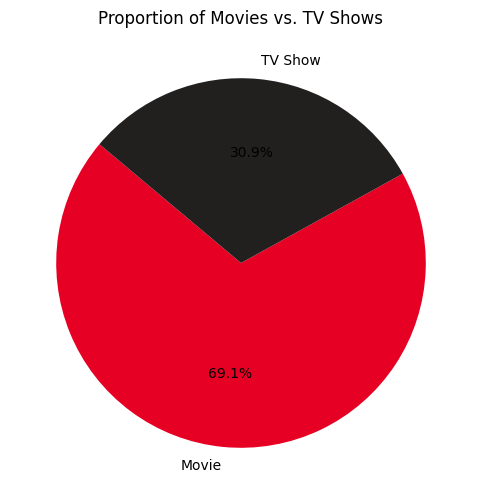

In [12]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

<Figure size 1400x800 with 0 Axes>

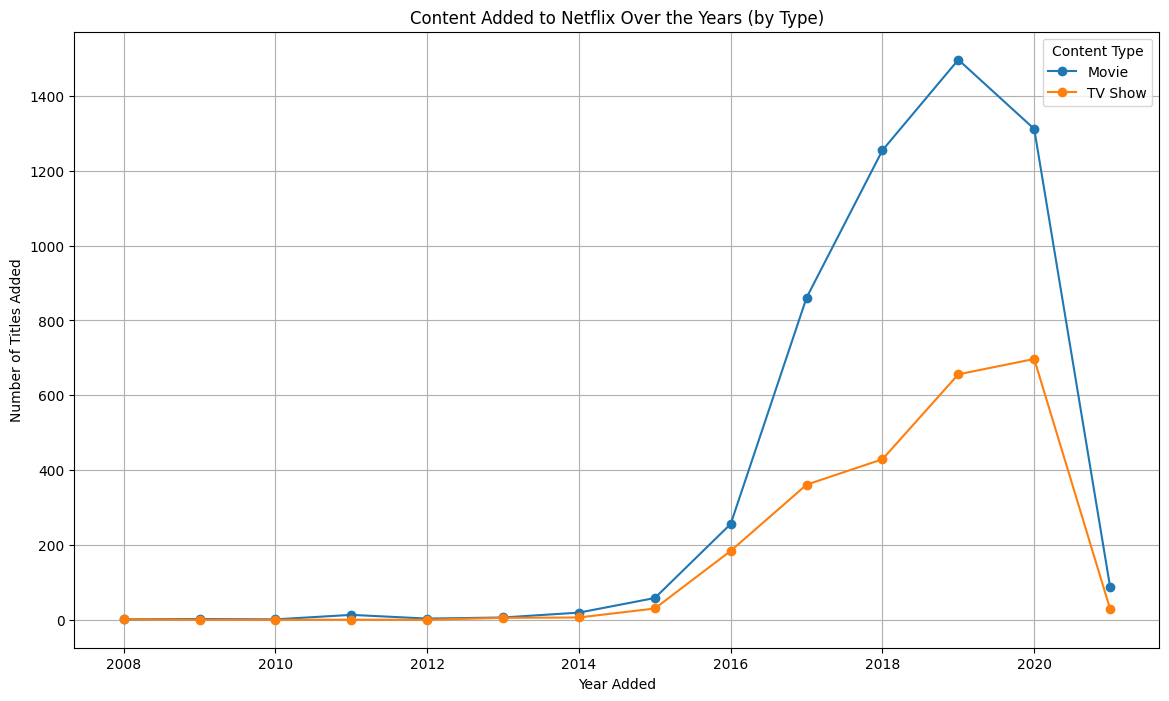

In [11]:
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

In [13]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [14]:
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

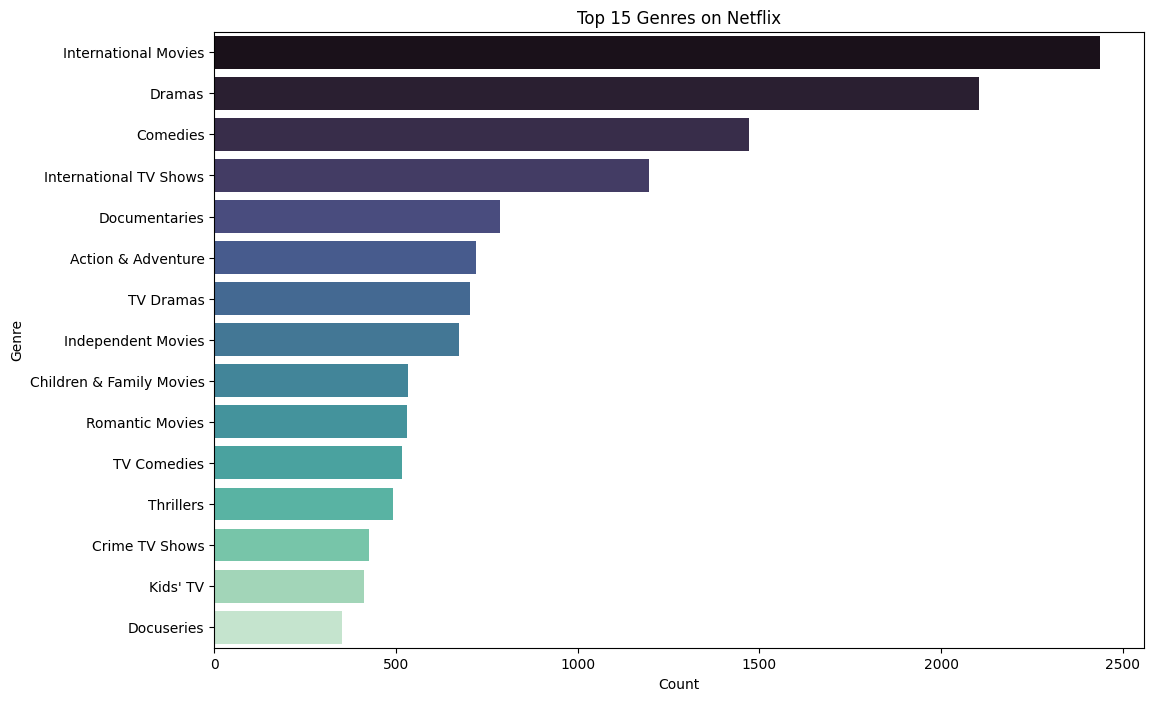

In [15]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [16]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [17]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

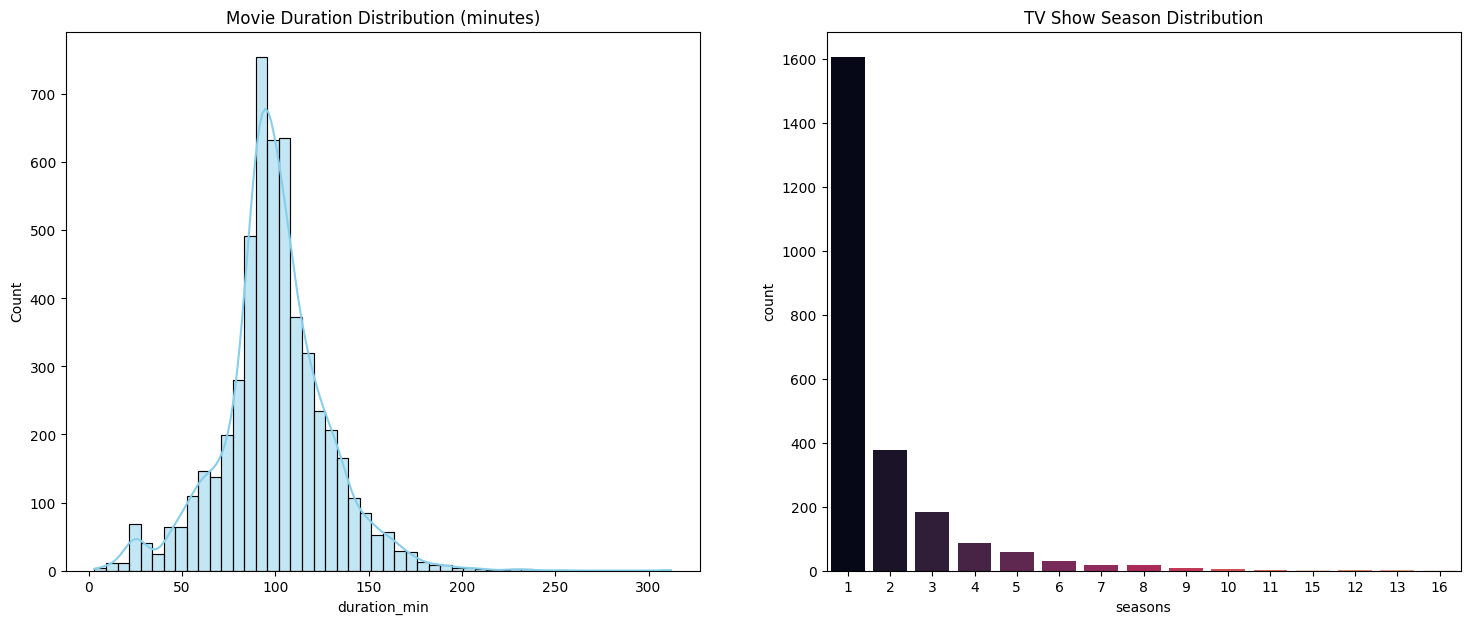

In [18]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')
plt.show()

In [19]:
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [20]:
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count']

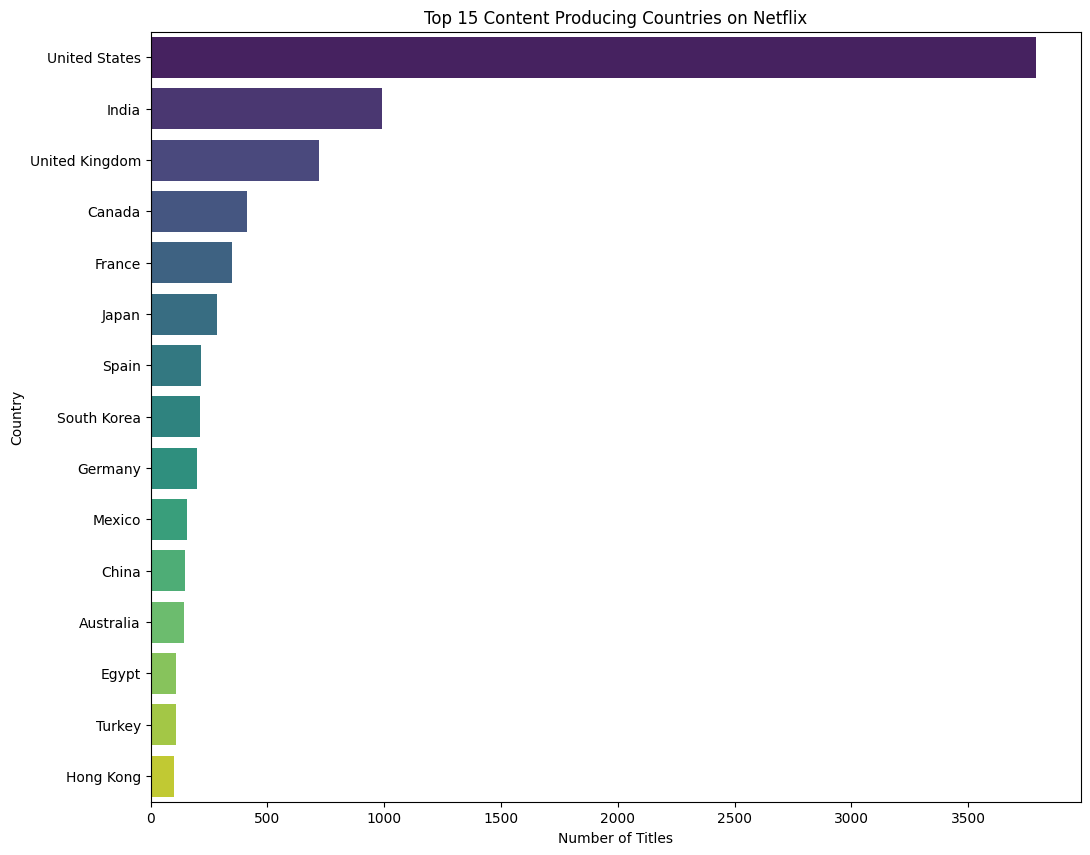

In [21]:
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

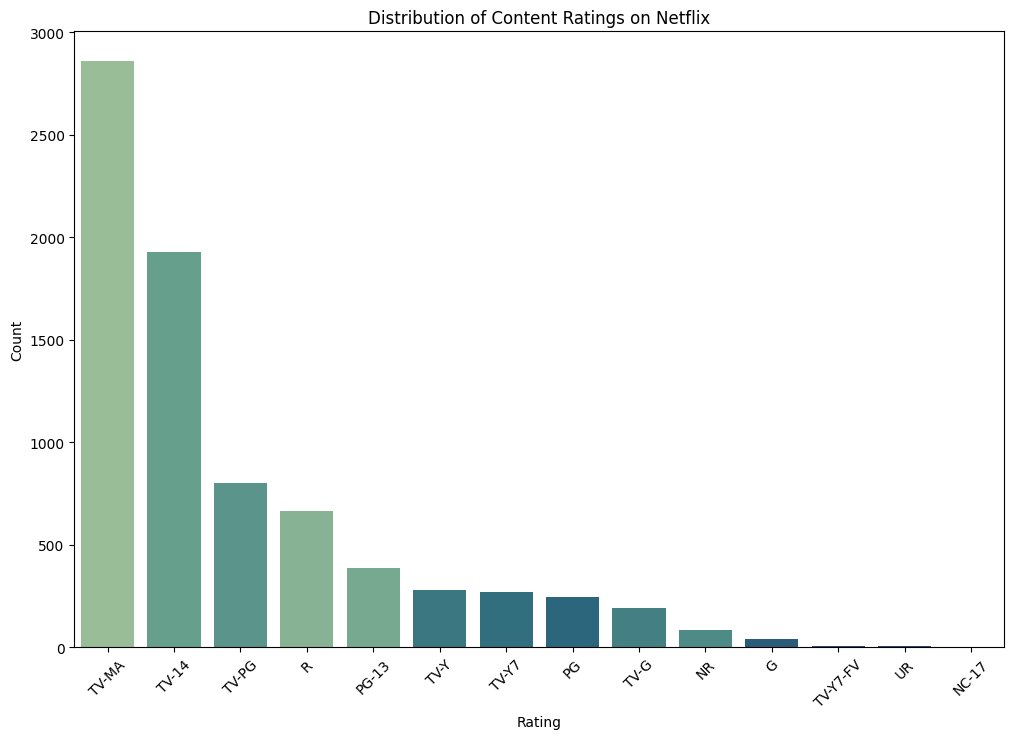

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

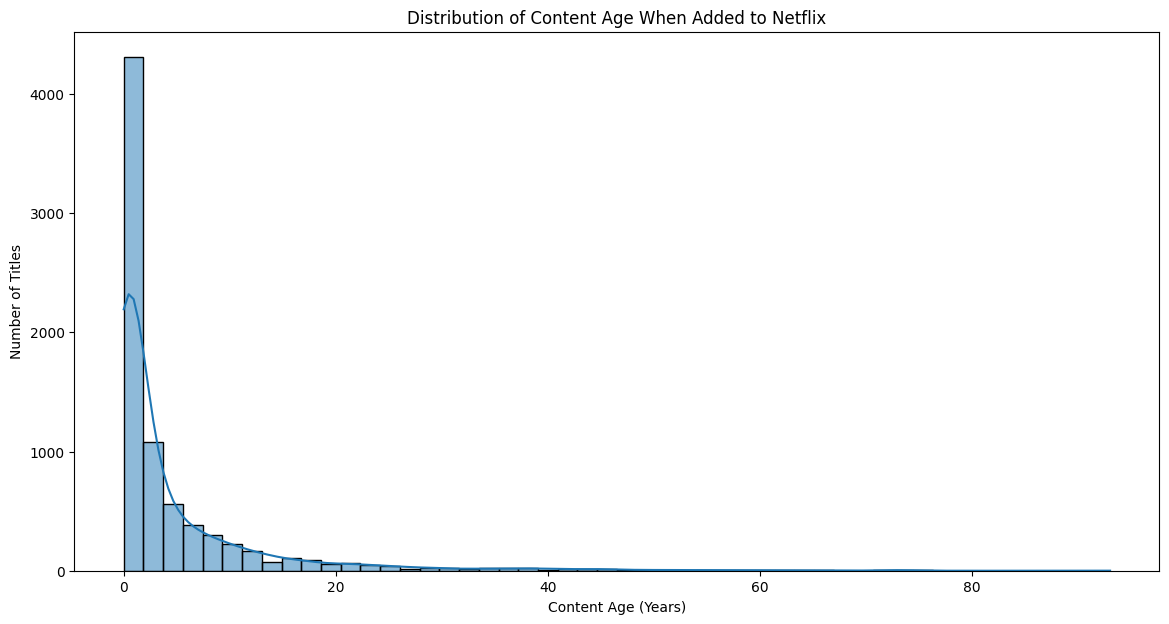

In [23]:

netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]
plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

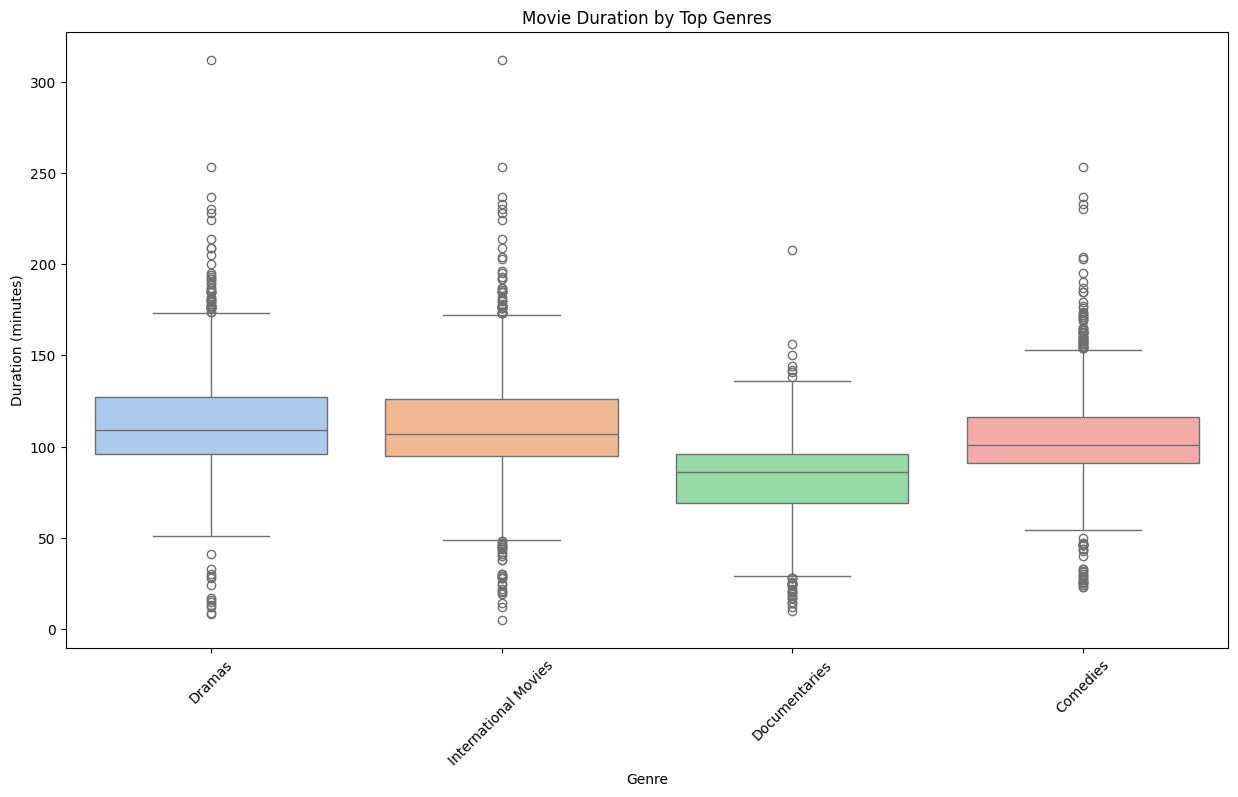

In [24]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

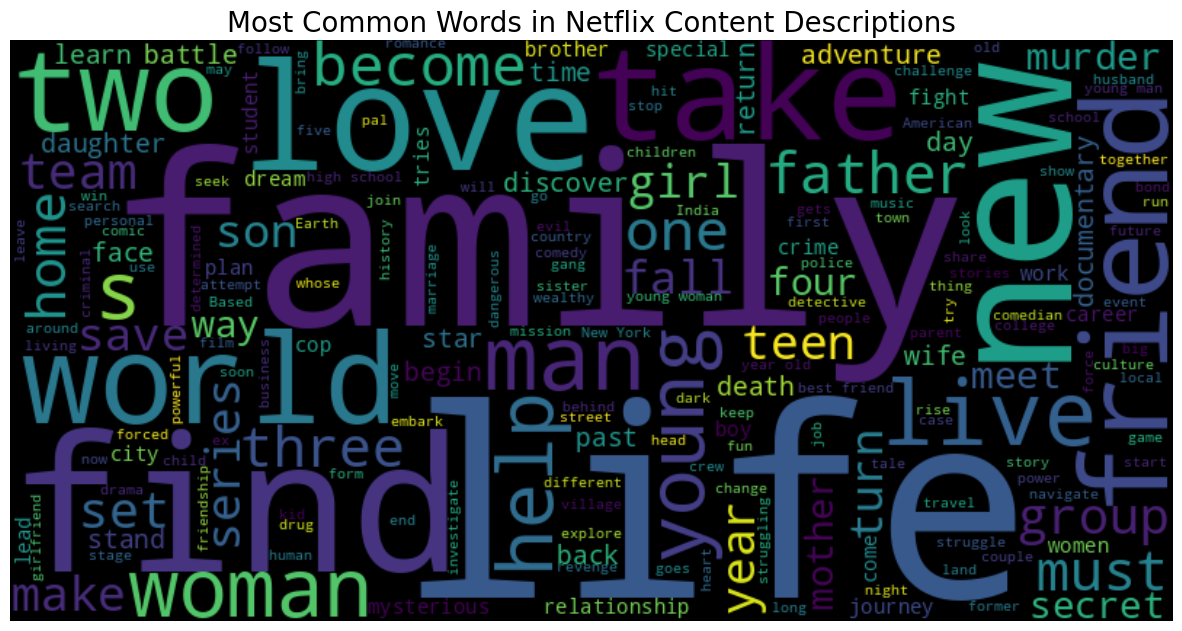

In [25]:
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

###Question-1) How has the distribution of content ratings changed over time?

###We group titles by year_added and rating to see how the mix of content ratings (e.g., TV-MA, PG, R) has changed. A stacked bar shows absolute growth, while a heatmap shows shifts in proportions.

<Figure size 1400x600 with 0 Axes>

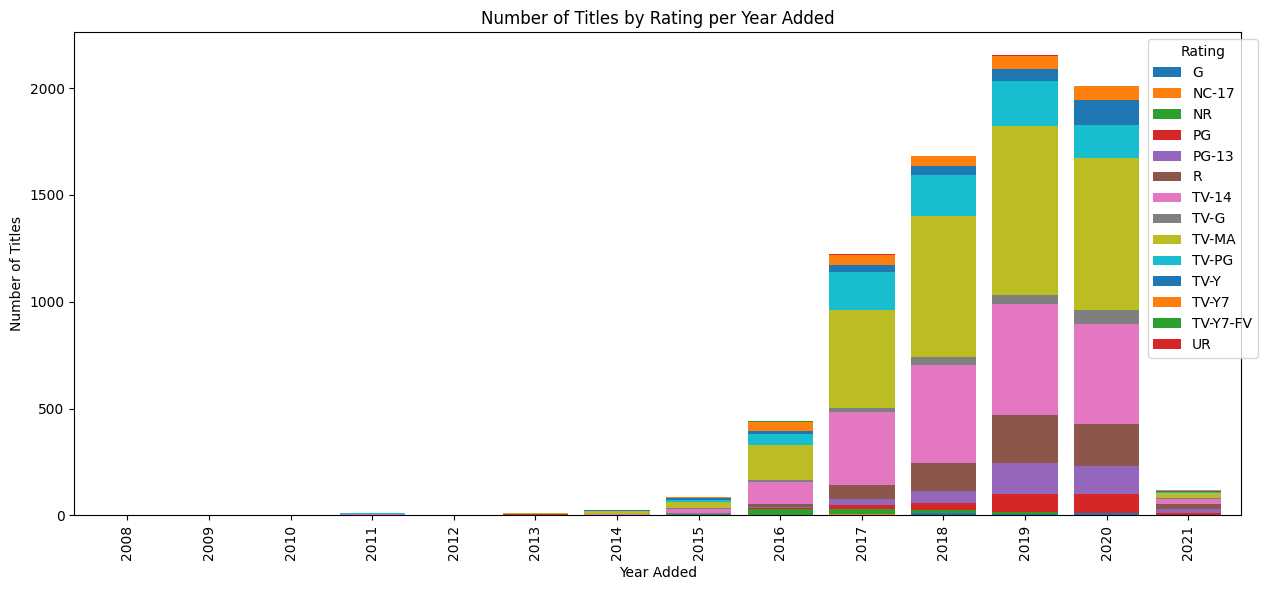

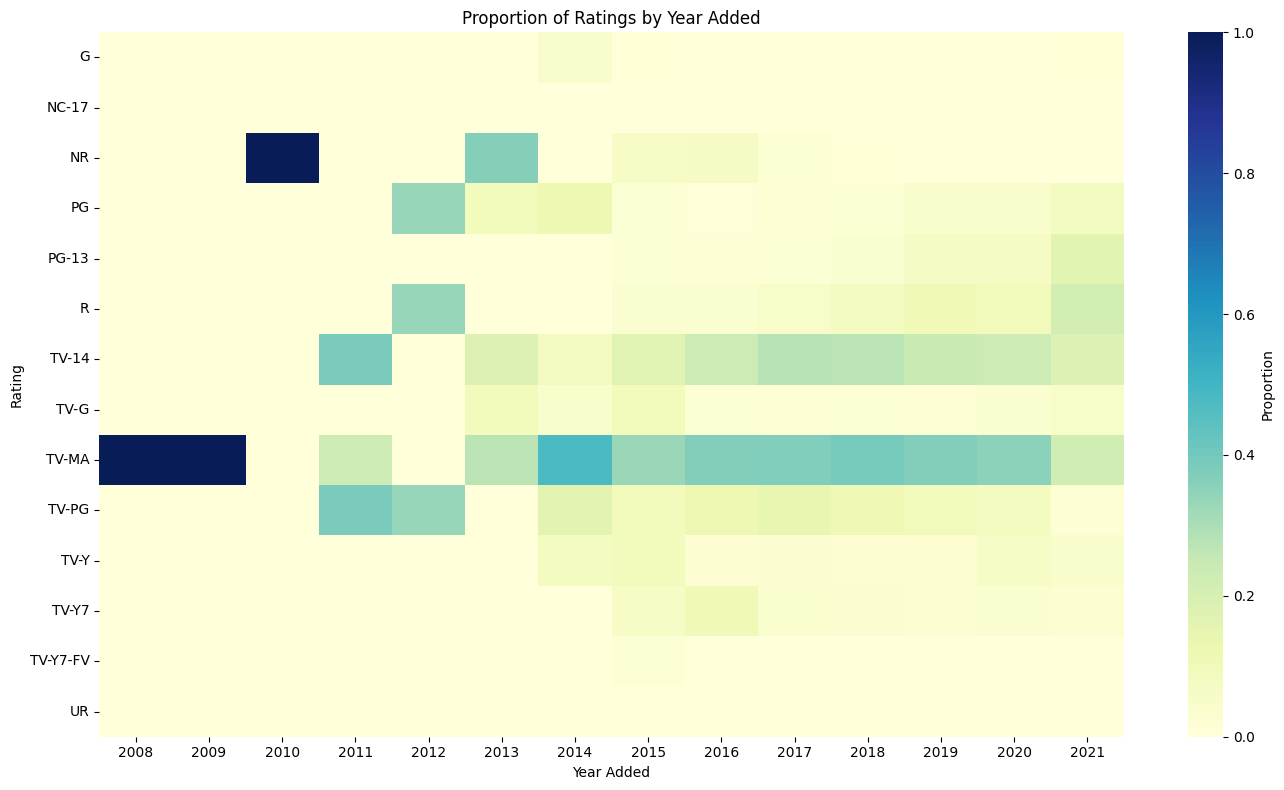

In [26]:
# Ratings over time: counts and proportions
rating_year = netflix_df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)

# Stacked bar (absolute counts)
plt.figure(figsize=(14,6))
rating_year.plot(kind='bar', stacked=True, width=0.8, figsize=(14,6))
plt.title('Number of Titles by Rating per Year Added')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

# Heatmap of proportions (how rating mix changed)
rating_prop = rating_year.div(rating_year.sum(axis=1), axis=0).fillna(0)
plt.figure(figsize=(14,8))
sns.heatmap(rating_prop.T, cmap='YlGnBu', annot=False, cbar_kws={'label':'Proportion'})
plt.title('Proportion of Ratings by Year Added')
plt.xlabel('Year Added')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


###2) Is there a relationship between content age and its type (Movie vs. TV Show)?

###We calculate age_on_netflix = year_added - release_year to measure how old a title was when added. Comparing distributions by type reveals if Netflix tends to add older movies vs. newer TV shows.

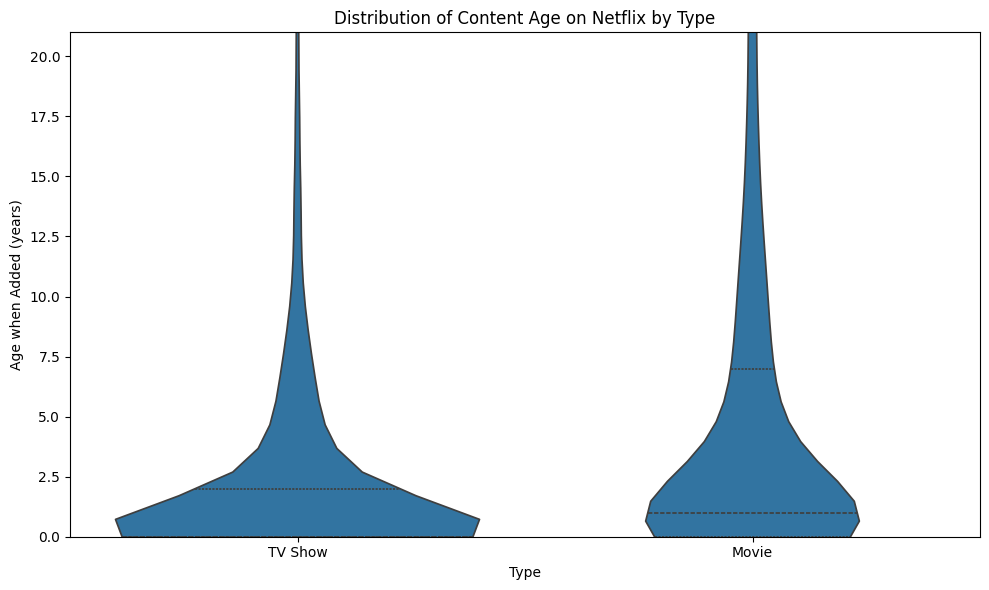

Mann-Whitney U stat = 8101952.00, p-value = 2.289e-81


In [27]:
# Ensure age_on_netflix exists and is non-negative
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']
df_age = netflix_df[netflix_df['age_on_netflix'].notna() & (netflix_df['age_on_netflix'] >= 0)].copy()

# Boxplot + violin to compare
plt.figure(figsize=(10,6))
sns.violinplot(data=df_age, x='type', y='age_on_netflix', inner='quartile')
plt.title('Distribution of Content Age on Netflix by Type')
plt.xlabel('Type')
plt.ylabel('Age when Added (years)')
plt.ylim(0, df_age['age_on_netflix'].quantile(0.95))  # zoom in top 95% to avoid outlier stretch
plt.tight_layout()
plt.show()

# Statistical test: Mann-Whitney U (non-parametric) to compare age distributions
from scipy.stats import mannwhitneyu
movies_age = df_age[df_age['type']=='Movie']['age_on_netflix']
tv_age = df_age[df_age['type']=='TV Show']['age_on_netflix']
stat, pval = mannwhitneyu(movies_age, tv_age, alternative='two-sided')
print(f"Mann-Whitney U stat = {stat:.2f}, p-value = {pval:.3e}")


###3) Trends in content production: release year vs. year added to Netflix

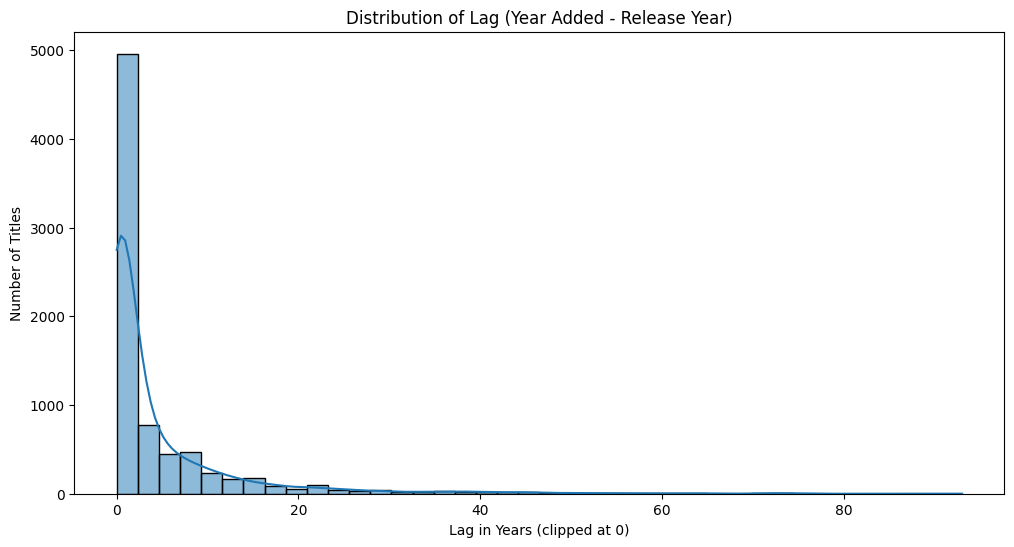

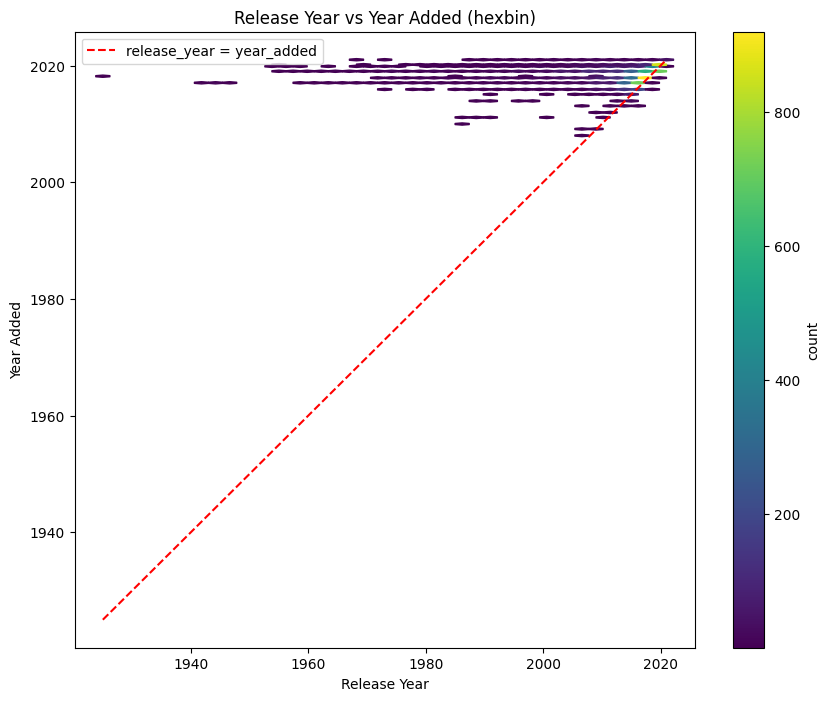

Median lag (years) by release decade:
 release_decade
1920    93.0
1940    73.0
1950    64.0
1960    54.0
1970    43.0
1980    34.0
1990    23.0
2000    13.0
2010     1.0
2020     0.0
Name: lag_years, dtype: float64


In [30]:
# Lag distribution (how long between release and being added)
netflix_df['lag_years'] = netflix_df['year_added'] - netflix_df['release_year']
lag = netflix_df[netflix_df['lag_years'].notna() & (netflix_df['lag_years'] >= -1)]  # allow -1 if release same year notation off

plt.figure(figsize=(12,6))
sns.histplot(lag['lag_years'].clip(lower=0), bins=40, kde=True)
plt.title('Distribution of Lag (Year Added - Release Year)')
plt.xlabel('Lag in Years (clipped at 0)')
plt.ylabel('Number of Titles')
plt.show()

# Scatter (release_year vs year_added) with a 1:1 line
plt.figure(figsize=(10,8))
plt.hexbin(netflix_df['release_year'], netflix_df['year_added'], gridsize=40, mincnt=1)
plt.plot([netflix_df['release_year'].min(), netflix_df['release_year'].max()],
         [netflix_df['release_year'].min(), netflix_df['release_year'].max()],
         color='red', linestyle='--', label='release_year = year_added')
plt.colorbar(label='count')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.title('Release Year vs Year Added (hexbin)')
plt.legend()
plt.show()

# compute summary stats of lag by decade of release
netflix_df['release_decade'] = (netflix_df['release_year'] // 10) * 10
lag_by_decade = netflix_df.groupby('release_decade')['lag_years'].median().dropna().sort_index()
print("Median lag (years) by release decade:\n", lag_by_decade)



###4) Most common word pairs / phrases in content descriptions (bigrams & trigrams)

We examine the lag (year_added - release_year) to understand whether Netflix adds mostly recent releases or older catalog titles. A scatter plot highlights the relationship between release and addition years.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Preprocess descriptions lightly
def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

descs = netflix_df['description'].fillna('').map(clean_text)

# Bigrams
vectorizer2 = CountVectorizer(ngram_range=(2,2), stop_words='english', min_df=5)
X2 = vectorizer2.fit_transform(descs)
counts2 = np.asarray(X2.sum(axis=0)).ravel()
bigrams = sorted(zip(vectorizer2.get_feature_names_out(), counts2), key=lambda x: x[1], reverse=True)[:30]
print("Top 30 bigrams:")
for phrase, cnt in bigrams:
    print(f"{phrase}: {cnt}")

# Trigrams
vectorizer3 = CountVectorizer(ngram_range=(3,3), stop_words='english', min_df=4)
X3 = vectorizer3.fit_transform(descs)
counts3 = np.asarray(X3.sum(axis=0)).ravel()
trigrams = sorted(zip(vectorizer3.get_feature_names_out(), counts3), key=lambda x: x[1], reverse=True)[:20]
print("\nTop 20 trigrams:")
for phrase, cnt in trigrams:
    print(f"{phrase}: {cnt}")


Top 30 bigrams:
high school: 133
year old: 130
young man: 103
young woman: 98
new york: 86
small town: 59
best friend: 51
true story: 48
stand special: 47
world war: 46
best friends: 45
based true: 43
documentary follows: 38
los angeles: 38
war ii: 38
falls love: 37
documentary series: 35
york city: 35
road trip: 33
serial killer: 32
martial arts: 30
young boy: 28
social media: 27
fall love: 26
police officer: 26
hong kong: 25
real life: 25
young girl: 25
love life: 24
true events: 24

Top 20 trigrams:
world war ii: 38
new york city: 35
based true story: 25
based true events: 16
11 year old: 13
10 year old: 12
year old girl: 10
17 year old: 8
dreams come true: 8
inspired true events: 8
12 year old: 7
15 year old: 7
high school senior: 7
journey self discovery: 7
life turned upside: 7
year old boy: 7
14 year old: 6
based real events: 6
game cat mouse: 6
high school girl: 6


###5) Top directors on Netflix

Top 30 Directors / Credits on Netflix:
director
Unknown                2376
Jan Suter                21
Raúl Campos              19
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Martin Scorsese          12
Jay Chapman              12
Steven Spielberg         10
Anurag Kashyap            9
David Dhawan              9
Shannon Hartman           9
Johnnie To                8
Hakan Algül               8
Lance Bangs               8
Justin G. Dyck            8
Kunle Afolayan            8
Quentin Tarantino         8
Umesh Mehra               8
Ryan Polito               8
Yılmaz Erdoğan            8
Robert Rodriguez          8
Don Michael Paul          7
S.S. Rajamouli            7
Hanung Bramantyo          7
Leslie Small              7
Dibakar Banerjee          7
McG                       7
Noah Baumbach             7
Name: count, dtype: int64


/tmp/ipython-input-1403824905.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.head(15).index, x=top_directors.head(15).values, palette='magma')


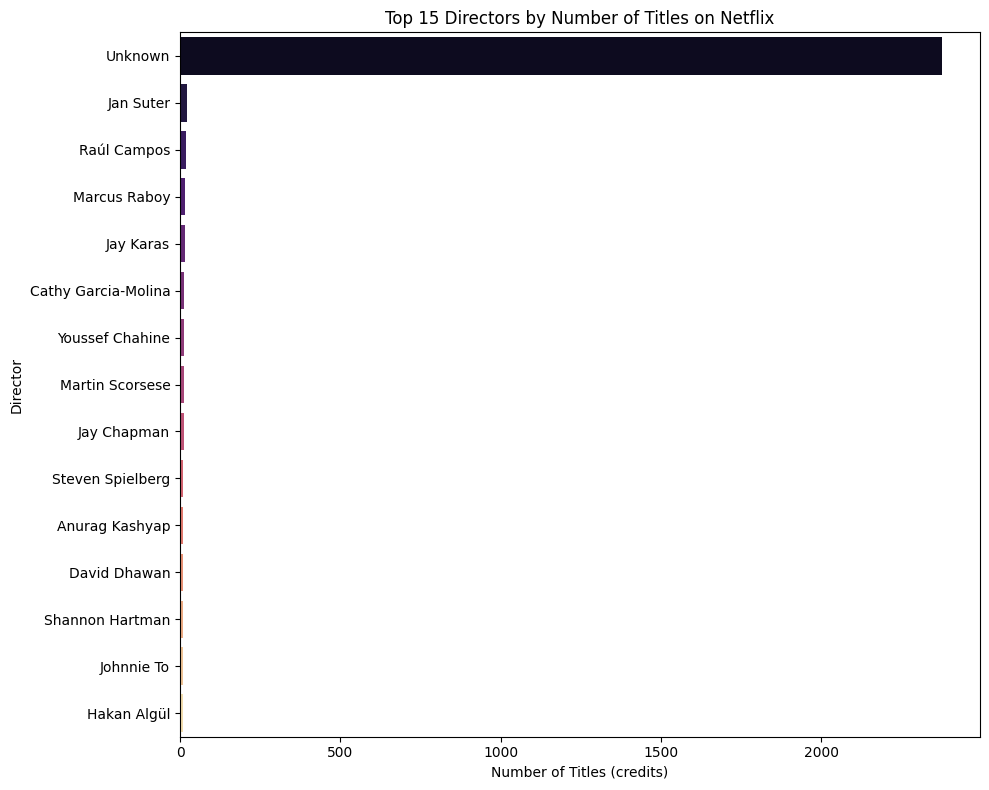

In [31]:
# Normalize and explode directors
dir_series = netflix_df['director'].fillna('Unknown').astype(str)
# split on comma, strip whitespace
dir_exploded = dir_series.str.split(',').explode().str.strip()
dir_exploded = dir_exploded[dir_exploded != '']  # drop blanks

top_directors = dir_exploded.value_counts().head(30)
print("Top 30 Directors / Credits on Netflix:")
print(top_directors)

# Visualize top 15
plt.figure(figsize=(10,8))
sns.barplot(y=top_directors.head(15).index, x=top_directors.head(15).values, palette='magma')
plt.title('Top 15 Directors by Number of Titles on Netflix')
plt.xlabel('Number of Titles (credits)')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
